# 📌 Імпорт необхідних бібліотек

Для виконання аналізу даних, їхньої обробки, візуалізації та побудови моделей машинного навчання імпортовано такі бібліотеки:

### 🔹 Обробка даних:
- *StringIO* – для роботи з текстовими даними у вигляді файлового потоку.
- *NumPy* – для ефективної роботи з багатовимірними масивами та обчислювальними операціями.
- *pandas* – для завантаження, обробки та аналізу табличних даних.

### 🔹 Візуалізація:
- *Matplotlib* – для побудови графіків та діаграм.
- *Seaborn* – для статистичної візуалізації даних.

### 🔹 Методи машинного навчання:
- *scikit-learn*:
  - *RandomForestClassifier* – для побудови моделі класифікації на основі випадкового лісу.
  - *train_test_split* – для розділення вибірки на навчальну та тестову.
  - *LabelEncoder* – для кодування категоріальних змінних.
  - Метрики *accuracy_score*, *precision_score*, *recall_score*, *f1_score*, *roc_auc_score* – для оцінювання точності моделі.

### 🔹 Парсинг веб-даних:
- *requests* – для отримання HTML-сторінок із веб-сайтів.
- *BeautifulSoup* – для обробки HTML-коду та вилучення необхідної інформації.

### 🔹 Вимкнення системних попереджень:
- Щоб уникнути відображення зайвих попереджувальних повідомлень у процесі виконання коду, використано модуль *warnings*.


In [1]:
from io import StringIO  

import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

import requests
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# 🔍 Отримання даних із сайту  

Здійснюється підключення до веб-ресурсу та обробка отриманої інформації за допомогою *BeautifulSoup*.  


In [57]:
url = "https://data-analys.netlify.app/"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

data_dict = {
    block.find("h5", class_="card-title").get_text(strip=True): 
    block.find("p", class_="card-text").get_text(strip=True)
    for block in soup.find_all("div", class_="card mb-3")[-2:]
}

print(data_dict.keys())

dict_keys(['Activity', 'Active users'])


# 📊 Підготовка та обробка даних  

Завантаження, об'єднання та очищення датасетів для подальшого аналізу. 

In [3]:
df_Active_users = pd.read_csv(StringIO(data_dict['Active users']))
df_Activity = pd.read_csv(StringIO(data_dict['Activity']))

df = df_Activity.merge(df_Active_users, how='left', on='user_id')

df['language'] = df['language'].replace('ru', 'eu')
df['activity_date'] = pd.to_datetime(df['activity_date'])
df = df.drop(df[df['total_seconds'] > df['total_seconds'].quantile(0.90)].index, axis=0).reset_index(drop=True)

print(df.info())
print(df.isna().sum())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39611 entries, 0 to 39610
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   user_id                 39611 non-null  object        
 1   activity_date           39611 non-null  datetime64[ns]
 2   game_activity_name      39611 non-null  object        
 3   total_seconds           39611 non-null  int64         
 4   game_name               39611 non-null  object        
 5   language                39611 non-null  object        
 6   has_older_device_model  39611 non-null  bool          
 7   age                     39611 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(2), object(4)
memory usage: 2.2+ MB
None
user_id                   0
activity_date             0
game_activity_name        0
total_seconds             0
game_name                 0
language                  0
has_older_device_model    0
age          

,user_id,activity_date,game_activity_name,total_seconds,game_name,language,has_older_device_model,age
0,5Xx7q8xw22flTcYbZ1XZVQ==,2022-09-25,game 3: Main campaign,266,game 3,uk,False,26
1,5Xx7q8xw22flTcYbZ1XZVQ==,2022-09-25,game 3: Special events,43,game 3,uk,False,26
2,C/7YatYfa4qFbB1omZ7Jjw==,2022-09-05,game 2: Battle pass challenges,51,game 2,uk,False,52
3,C/7YatYfa4qFbB1omZ7Jjw==,2022-09-28,game 2: Battle pass challenges,846,game 2,uk,False,52
4,C/7YatYfa4qFbB1omZ7Jjw==,2022-10-13,game 2: Battle pass challenges,656,game 2,uk,False,52


# 📌 Аналіз розподілу мов користувачів  

Візуалізація кількості користувачів за мовними категоріями.  

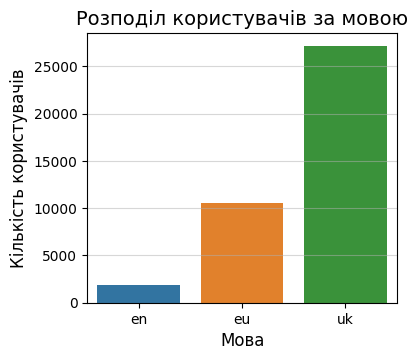

In [4]:
language = df.groupby('language')['user_id'].count()

plt.figure(figsize=(4, 3.5))
sns.barplot(x=language.index, y=language, hue=language.index)
plt.xlabel("Мова", fontsize=12)
plt.ylabel("Кількість користувачів", fontsize=12)
plt.title("Розподіл користувачів за мовою", fontsize=14)
plt.grid(axis="y", linestyle="-", alpha=0.5)

plt.show()

# 📌 Аналіз використання застарілих пристроїв  

Діаграма відображає розподіл користувачів залежно від наявності застарілої моделі пристрою.  

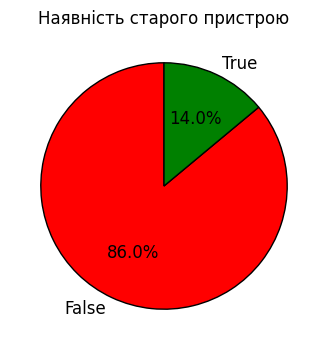

In [5]:
has_older_device = df.groupby('has_older_device_model')['user_id'].count().reset_index()

plt.figure(figsize=(4, 4))

plt.pie(
    has_older_device['user_id'], 
    labels=has_older_device['has_older_device_model'], 
    colors=["red", "green"], 
    startangle=90, 
    textprops={"fontsize": 12}, 
    wedgeprops={"linewidth": 1, "edgecolor": "black"}, 
    autopct="%1.1f%%"
)

plt.title('Наявність старого пристрою')
plt.show()


# 📊 Динаміка активності користувачів  

### Основні метрики:  
- **DAU (Daily Active Users)** – кількість унікальних користувачів, які заходили в систему протягом дня.  
- **WAU (Weekly Active Users)** – кількість унікальних користувачів за тиждень, що допомагає оцінити стабільність залученості.  
- **MAU (Monthly Active Users)** – кількість унікальних користувачів за місяць, що дозволяє аналізувати довготривалу активність.

На графіках представлена кількість активних користувачів за день (DAU), тиждень (WAU) та місяць (MAU).  
Цей аналіз дозволяє оцінити загальний рівень активності та виявити можливі тенденції.  

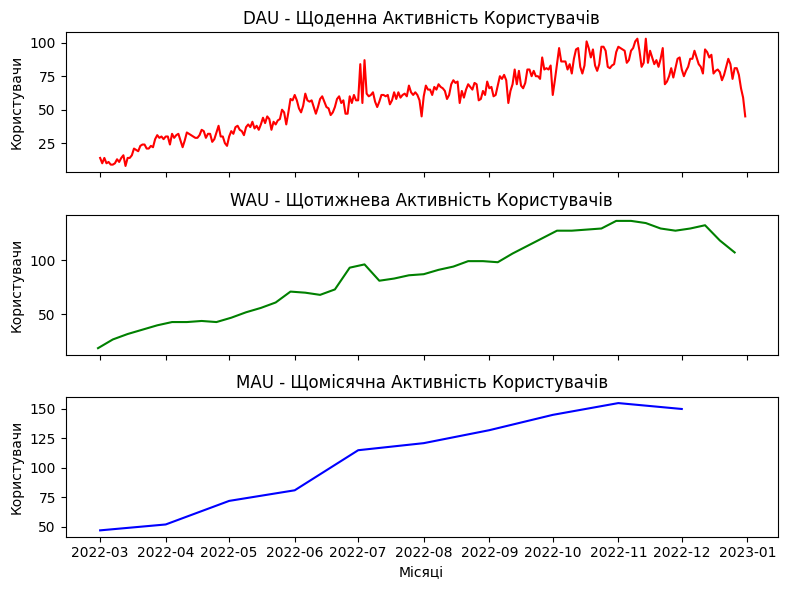

In [6]:
dau = df.groupby('activity_date')['user_id'].nunique().reset_index()

df['week_start_date'] = df['activity_date'].dt.to_period('W').apply(lambda x: x.start_time)
wau = df.groupby('week_start_date')['user_id'].nunique().reset_index()

df['month_start_date'] = df['activity_date'].dt.to_period('M').apply(lambda x: x.start_time)
mau = df.groupby('month_start_date')['user_id'].nunique().reset_index()

fig, axes = plt.subplots(3, 1, figsize=(8, 6), sharex=True)

sns.lineplot(ax=axes[0], x=dau["activity_date"], y=dau['user_id'], color="red")
axes[0].set_title("DAU - Щоденна Активність Користувачів")
axes[0].set_ylabel("Користувачи")

sns.lineplot(ax=axes[1], x=wau["week_start_date"], y=wau['user_id'], color="green")
axes[1].set_title("WAU - Щотижнева Активність Користувачів")
axes[1].set_ylabel("Користувачи")

sns.lineplot(ax=axes[2], x=mau["month_start_date"], y=mau["user_id"], color="blue")
axes[2].set_title("MAU - Щомісячна Активність Користувачів")
axes[2].set_ylabel("Користувачи")
axes[2].set_xlabel("Місяці")

plt.tight_layout()
plt.show()

# 📉 Відношення Average DAU до WAU  

### Що аналізується?  

- **Середній DAU за тиждень** – Середня кількість щоденно активних користувачів за тиждень:  
$$ \text{Average DAU} = \frac{\sum_{i=1}^{7} DAU_i}{7} $$
- **Average DAU/WAU** – показник, що дозволяє оцінити, наскільки часто користувачі взаємодіють із системою протягом тижня. 

### Інтерпретація:  
- Значення **DAU/WAU** близьке до 1 означає, що користувачі активні майже щодня.  
- Низьке значення вказує на те, що більшість користувачів заходять лише кілька разів на тиждень.  

Цей аналіз допомагає оцінити рівень залученості користувачів та передбачати тенденції в їх поведінці.


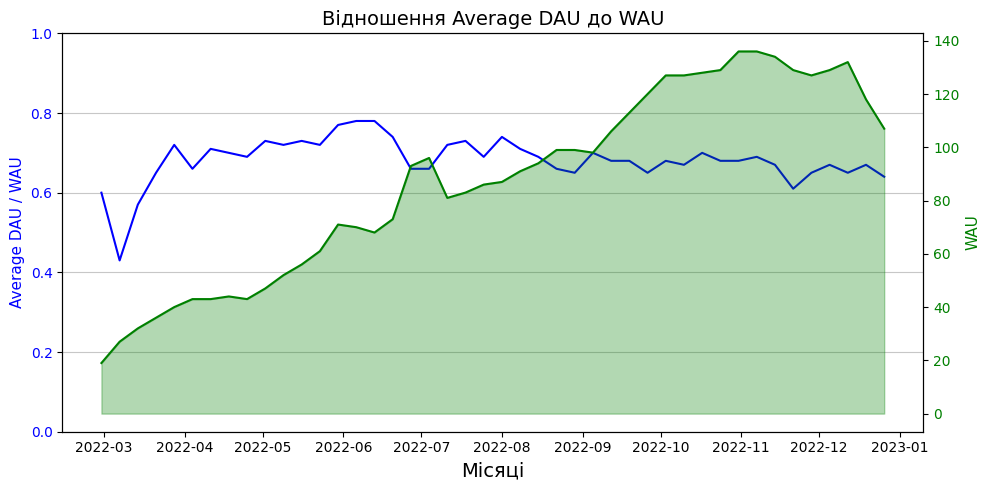

In [29]:
dau['week_start_date'] = dau['activity_date'].dt.to_period('W').apply(lambda x: x.start_time)
average_dau = dau.groupby('week_start_date')['user_id'].mean().reset_index().round(2)

dau_to_wau = (average_dau['user_id'] / wau['user_id']).round(2)

fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.set_xlabel('Місяці', fontsize=14)
ax1.set_ylabel('Average DAU / WAU', color='blue', fontsize=11)
ax1.plot(average_dau['week_start_date'], dau_to_wau, color='blue', label='DAU / WAU')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylim(0, 1)
ax1.yaxis.grid(True, linestyle='-', alpha=0.7)

ax2 = ax1.twinx()
ax2.set_ylabel('WAU', color='green', fontsize=11)
ax2.fill_between(wau['week_start_date'], wau['user_id'], color='green', alpha=0.3)
ax2.plot(wau['week_start_date'], wau['user_id'], color='green', label='WAU')
ax2.tick_params(axis='y', labelcolor='green')
ax2.set_title("Відношення Average DAU до WAU", fontsize=14)

fig.tight_layout()
plt.show()

# 🔥 Когортний аналіз користувачів  

### Що це?  
Когортний аналіз дозволяє оцінити **утримання користувачів** за певні періоди часу, групуючи їх за місяцем першої активності.  

### Основні метрики:  
- **Кількість користувачів у кожній когорті** (теплова карта в зелених відтінках).  
- **Процент утримання користувачів** у наступні місяці після першої активності (теплова карта в синіх відтінках).  

### Інтерпретація:  
- Високе значення утримання означає, що користувачі залишаються активними протягом тривалого часу.  
- Низьке утримання вказує на можливі проблеми в залученні або зацікавленості аудиторії.  

Цей аналіз є корисним для оцінки довгострокової ефективності продукту та оптимізації користувацького досвіду.


In [ ]:
df['cohort_month'] = df.groupby('user_id')['activity_date'].transform('min').dt.to_period('M')
df["activity_month"] = df["activity_date"].dt.to_period("M")
df["cohort_index"] = (df["activity_month"] - df["cohort_month"]).apply(lambda x: x.n)

cohort_table = df.groupby(["cohort_month", "cohort_index"])["user_id"].nunique().unstack().fillna(0)

cohort_size = cohort_table.iloc[:, 0] 
retention_matrix = cohort_table.div(cohort_size, axis=0) * 100 

annot = retention_matrix.applymap(lambda x: f"{x:.1f}%" if x > 0 else "")

fig, axes = plt.subplots(2, 1, figsize=(7*np.sqrt(2), 7), gridspec_kw={'wspace': 0.3})

ax1 = sns.heatmap(cohort_table, annot=True, cmap="Greens", mask=cohort_table == 0, ax=axes[0])
ax1.set_title("Когорний аналіз – Кількість користувачів", pad=20, fontsize=14, fontweight="bold")
ax1.set_xlabel("Місяці після першої активності", fontsize=12)
ax1.set_ylabel("Місяць когорти", fontsize=12)
ax1.xaxis.set_label_position("top")  
ax1.xaxis.tick_top()

ax2 = sns.heatmap(retention_matrix, annot=annot, fmt="", cmap="Blues", mask=retention_matrix == 0, ax=axes[1])
ax2.set_title("Когорний аналіз – Відсоток утримання", pad=20, fontsize=14, fontweight="bold")
ax2.set_xlabel("Місяці після першої активності", fontsize=12)
ax2.set_ylabel("Місяць когорти", fontsize=12)
ax2.xaxis.set_label_position("top")  
ax2.xaxis.tick_top()

plt.show()


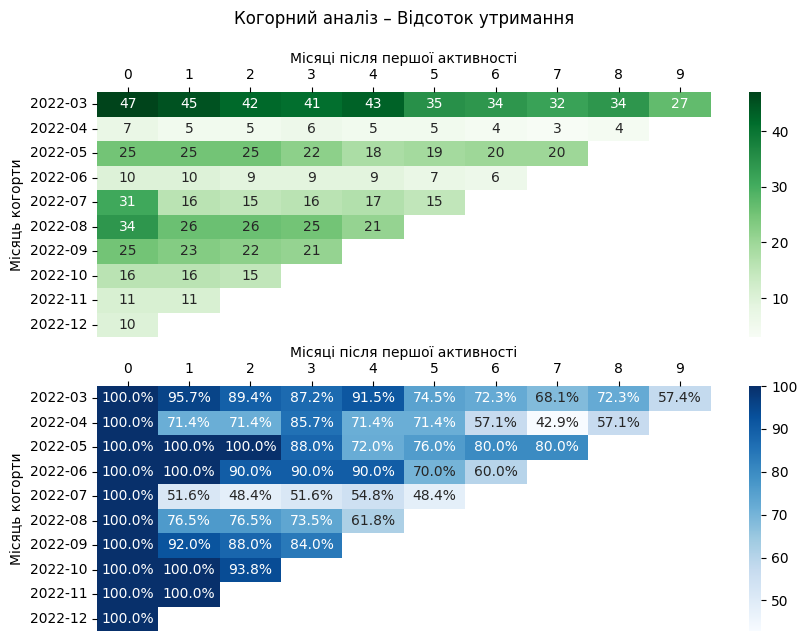

In [35]:
df['cohort_month'] = df.groupby('user_id')['activity_date'].transform('min').dt.to_period('M')
df["activity_month"] = df["activity_date"].dt.to_period("M")
df["cohort_index"] = (df["activity_month"] - df["cohort_month"]).apply(lambda x: x.n)

cohort_table = df.groupby(["cohort_month", "cohort_index"])["user_id"].nunique().unstack().fillna(0)

cohort_size = cohort_table.iloc[:, 0] 
retention_matrix = cohort_table.div(cohort_size, axis=0) * 100 

annot = retention_matrix.applymap(lambda x: f"{x:.1f}%" if x > 0 else "")

fig, axes = plt.subplots(2, 1, figsize=(7*np.sqrt(2), 7), gridspec_kw={'wspace': 0.3})

ax1 = sns.heatmap(cohort_table, annot=True, cmap="Greens", mask=cohort_table == 0, ax=axes[0])
ax1.set_title("Когорний аналіз – Відсоток утримання", pad=20)
ax1.set_xlabel("Місяці після першої активності")
ax1.set_ylabel("Місяць когорти")
ax1.xaxis.set_label_position("top")  
ax1.xaxis.tick_top()

ax2 = sns.heatmap(retention_matrix, annot=annot, fmt="", cmap="Blues", mask=retention_matrix == 0, ax=axes[1])
ax2.set_xlabel("Місяці після першої активності")
ax2.set_ylabel("Місяць когорти")
ax2.xaxis.set_label_position("top")  
ax2.xaxis.tick_top()

plt.show()

## Визначення ключових факторів відтоку користувачів  

Ця модель **не просто передбачає відтік**, а **визначає, які фактори найбільше на нього впливають**.  

### 🔍 Як це працює?  
1. **Формуються ознаки** (*features*), що можуть впливати на відтік:  
   - Вік  
   - Мова  
   - Наявність старого пристрою  
   - Різноманітність активності  
   - Кількість днів активності в грі  
   - Чи активно гравець протягом першого тижня  

2. **Навчається модель** (*Random Forest Classifier*), яка прогнозує ймовірність відтоку.  

3. **Визначається важливість факторів**, щоб **зрозуміти, які змінні найбільше впливають на відтік**.  

### 🎯 Практичне застосування  
Результати допомагають:  
- Визначити, які типи користувачів найбільше ризикують покинути платформу.  
- Оптимізувати взаємодію з гравцями, пропонуючи їм персоналізовані заходи утримання.  
- Підвищити ефективність маркетингових кампаній, орієнтуючись на найбільш уразливі групи.  


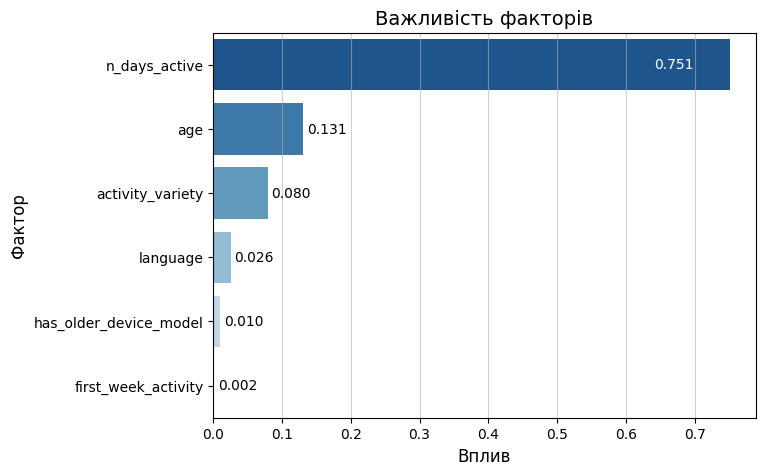

Accuracy: 0.8573
Precision: 0.7244
Recall: 0.4969
F1-score: 0.5895
ROC-AUC: 0.9146
Threshold: 0.40 | Precision: 0.6221 | Recall: 0.6499 | F1-score: 0.6357
Threshold: 0.45 | Precision: 0.6553 | Recall: 0.5887 | F1-score: 0.6202
Threshold: 0.50 | Precision: 0.7244 | Recall: 0.4969 | F1-score: 0.5895
Threshold: 0.55 | Precision: 0.8052 | Recall: 0.3819 | F1-score: 0.5181
Threshold: 0.60 | Precision: 0.8540 | Recall: 0.3329 | F1-score: 0.4791
Threshold: 0.65 | Precision: 0.8951 | Recall: 0.2821 | F1-score: 0.4290


In [56]:
df['n_days_active'] = df.groupby('user_id')['activity_date'].transform('nunique')
df['activity_variety'] = df.groupby('user_id')['game_activity_name'].transform('nunique')
df['first_week_activity'] = df.groupby('user_id')['activity_date'].transform(lambda x: (x.max() - x.min()).days <= 7).astype(int)
df['churn'] = ((df['cohort_index'] <= 1) & (df['n_days_active'] < df['n_days_active'].median())).astype(int)

df['language'] = LabelEncoder().fit_transform(df['language'])
df['has_older_device_model'] = df['has_older_device_model'].astype(int)

features = ['age', 'language', 'has_older_device_model', 'first_week_activity', 'activity_variety', 'n_days_active']
X = df[features]
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_proba = rf.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba >= 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

feature_importance = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(7, 5))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette="Blues_r")

for index, value in enumerate(feature_importance.values):
    if value > 0.7:
        plt.text(value - 0.11, index, f"{value:.3f}", va='center', fontsize=10, color='white')
    else: 
        plt.text(value + 0.005, index, f"{value:.3f}", va='center', fontsize=10)

plt.title('Важливість факторів', fontsize=14)
plt.xlabel('Вплив', fontsize=12)
plt.ylabel('Фактор', fontsize=12)
plt.grid(axis="x", linestyle="-", alpha=0.6)
plt.show()


print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

def evaluate_threshold(threshold):
    y_pred_threshold = (y_pred_proba >= threshold).astype(int)
    precision = precision_score(y_test, y_pred_threshold)
    recall = recall_score(y_test, y_pred_threshold)
    f1 = f1_score(y_test, y_pred_threshold)
    print(f"Threshold: {threshold:.2f} | Precision: {precision:.4f} | Recall: {recall:.4f} | F1-score: {f1:.4f}")

for t in np.arange(0.4, 0.7, 0.05):
    evaluate_threshold(t)

### 📊 Аналіз результатів моделі

#### **Основні метрики класифікації**  
- **Accuracy**: 0.8573 – загальна точність моделі у передбаченні відтоку користувачів.  
- **Precision**: 0.7244 – точність моделі у визначенні тих, хто реально залишив гру.  
- **Recall**: 0.4969 – частка користувачів, які фактично пішли, і були правильно визначені.  
- **F1-score**: 0.5895 – баланс між точністю та повнотою, що показує ефективність моделі.  
- **ROC-AUC**: 0.9146 – якість розділення користувачів на тих, хто залишиться та піде.  

#### **Вплив факторів на відтік користувачів**  
Графік важливості факторів показує, які змінні найбільше впливають на рішення користувача залишитися або покинути гру.  

🔹 **Головні фактори** (_за значенням важливості_):  
1. **n_days_active (0.7511)** – кількість днів активності користувача є найсильнішим предиктором відтоку.  
2. **age (0.1310)** – вік користувача також впливає на ймовірність залишитися в грі.  
3. **activity_variety (0.0796)** – різноманітність активностей, якими користувач займався.  

🔹 **Менш значущі фактори**:  
- **language (0.0261)** – мова, якою користується гравець.  
- **has_older_device_model (0.0103)** – наявність старішої моделі пристрою.  
- **first_week_activity (0.0019)** – активність у перший тиждень гри.  

#### ⚖️ **Вибір порогу класифікації**

Я обрав **Threshold = 0.50**, оскільки він дає **збалансоване співвідношення** між **Precision (72.44%)** і **Recall (49.69%)**.  

- **Нижчі пороги (0.40 – 0.45)** підвищують Recall, але дають більше хибних спрацьовувань.  
- **Вищі пороги (0.55 – 0.65)** покращують Precision, але пропускають більшість користувачів, що йдуть.  

#### **🔎 Висновок**  
Окрім очевидного впливу активності, **вік гравця відіграє значну роль**. Це означає, що певні вікові групи схильні до більшого або меншого відтоку, і варто адаптувати ігровий контент чи комунікацію відповідно.  

Водночас **мова та модель пристрою практично не впливають** на відтік користувачів. Це свідчить про те, що технічні обмеження чи мовні фактори не є ключовими бар'єрами для утримання аудиторії.  

Отримані результати можуть допомогти у створенні персоналізованих стратегій утримання гравців, фокусуючись на вікових особливостях і залученні користувачів із різним рівнем активності.  
 
